# CatVsDog Hyper-parameter Experimentation
Developed by:
* Astrid Thalía Arteaga Romero A01420220
* Jorge Alexander Giovannetti Pulido A01283034

## 1 -  Packages
Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- load_dataset loads our dataset images into conveniently formatted numpy arrays.
- utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment with a couple tweaks for our experiments.
- np.random.seed(1) is used to keep all the random function calls consistent.

In [1]:
import numpy as np
from load_dataset import load_data
from utils import *

np.random.seed(1)

## 2 - Architecture of our model (L-layer Neural Network)

In [2]:
def L_layer_model(X, Y, layers_dims = [12288, 20, 7, 5, 1], learning_rate = 0.0075, num_iterations = 3000, activation_functions = ["relu", "relu", "relu", "sigmoid"], print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    activation_functions -- list containing the activation function for each layer.
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    assert len(layers_dims) == len(activation_functions) + 1

    np.random.seed(1)
    costs = [] # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        # Forward propagation:
        AL, caches = L_model_forward(X, parameters, activation_functions)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches, activation_functions)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 3 - Checking our model
As a way of checking if our model is correct, we implement grad-checking to verify that our backward propagation works correctly in conjunction with our forward propagation.

In [ ]:
def forward_prop_cost(X, parameters, Y, activation_functions):
    """
    Implements the forward propagation and computes the cost.
    
    Arguments
    ---------
    X : 2d-array
        input data, shape: number of features x number of examples.
    parameters : dict
        parameters to use in forward prop.
    Y : array
        true "label", shape: 1 x number of examples.
    hidden_layers_activation_fn : str
        activation function to be used on hidden layers: "tanh", "relu".

    Returns
    -------
    cost : float
        cross-entropy cost.
    """
    # Compute forward prop
    AL, _ = L_model_forward(X, parameters, activation_functions)

    # Compute cost
    cost = compute_cost(AL, Y)

    return cost

def gradient_check(parameters, gradients, X, Y, activation_functions, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing the generated parameters
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    activation_functions -- list containing the activation function for each layer.
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Roll out parameters and gradients dictionaries
    parameters_values = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)

    # Create vector of zeros to be used with epsilon
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))

    for i in range(len(parameters_values)):
        # Compute cost of theta + epsilon
        theta_plus = np.copy(parameters_values)
        theta_plus[i] = theta_plus[i] + epsilon
        j_plus = forward_prop_cost(X, vector_to_dictionary(theta_plus, layers_dims), Y, activation_functions)

        # Compute cost of theta - epsilon
        theta_minus = np.copy(parameters_values)
        theta_minus[i] = theta_minus[i] - epsilon
        j_minus = forward_prop_cost(X, vector_to_dictionary(theta_minus, layers_dims), Y, activation_functions)

        # Compute numerical gradients
        gradapprox[i] = (j_plus - j_minus) / (2 * epsilon)

    # Compute the difference of numerical and analytical gradients
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(gradapprox) + np.linalg.norm(grad)
    difference = numerator / denominator

    if difference > 10e-7:
        print ("There is a mistake in back-propagation implementation. The difference is: {}".format(difference))
    else:
        print ("The implementation of back-propagation is fine!. The difference is: {}".format(difference))

    return difference

In [ ]:
layers_dims = [12288, 20, 7, 5, 1]
activation_functions = ["relu", "relu", "relu", "sigmoid"]
parameters = initialize_parameters_deep(layers_dims)

X = np.random.randint(255, size=(12288, 5))/255.
Y = np.random.randint(0, 2, size=(1, 5))

AL, caches = L_model_forward(X, parameters, activation_functions)
cost = compute_cost(AL, Y)

grads = L_model_backward(AL, Y, caches, activation_functions)
difference = gradient_check(parameters, grads, X, Y, activation_functions)

## 4 - Dataset
The dataset we selected comes from Kaggle it is called "Dogs & Cats Images", there are 5000 pictures of cats and 5000 pictres of dogs.
A 1000 cat and dog images are set for dev, another 1000 cat and dog images are set for testing and 3000 cat and dog images are set for training.

LINK:https://www.kaggle.com/chetankv/dogs-cats-images

We'll use our dev_set for experimenting and when we reach our objective we'll train the model with the train set and, finally, test our results with the test set.

In [3]:
dev_x_orig, dev_y, classes = load_data('dev_set')
train_x_orig, train_y, classes = load_data('training_set')
test_x_orig, test_y, classes = load_data('test_set')

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 607.02it/s]


In [4]:
# Exploring our dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of train examples: " + str(m_train))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))

Number of train examples: 4000
Each image is of size: (64, 64, 3)
train_x_orig shape: (4000, 64, 64, 3)
train_y shape: (1, 4000)


In [5]:
# Reshape the training and test examples 
dev_x_flatten = dev_x_orig.reshape(dev_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
dev_x = dev_x_flatten/255.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("dev_x's shape: " + str(dev_x.shape))
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


dev_x's shape: (12288, 4000)
train_x's shape: (12288, 4000)
test_x's shape: (12288, 2000)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 5 - Hyper-parameters

We decided to experiment with the following hyper-parameters:
- Learning rate
- Number of iterations
- Number of layers
- Number of neurons in each layer

## Experiments

### Experiment #1: Default hyper-parameters
As a way of getting a baseline result for our experimentation process, we decided to use the same hyper-parameters we used in class for our first experiment.

Cost after iteration 0: 0.717320
Cost after iteration 100: 0.683365
Cost after iteration 200: 0.673795
Cost after iteration 300: 0.664740
Cost after iteration 400: 0.656447
Cost after iteration 500: 0.649228
Cost after iteration 600: 0.643730
Cost after iteration 700: 0.636683
Cost after iteration 800: 0.630496
Cost after iteration 900: 0.624051
Cost after iteration 1000: 0.618000
Cost after iteration 1100: 0.611934
Cost after iteration 1200: 0.605964
Cost after iteration 1300: 0.601975
Cost after iteration 1400: 0.595136
Cost after iteration 1500: 0.590568
Cost after iteration 1600: 0.587541
Cost after iteration 1700: 0.582345
Cost after iteration 1800: 0.572344
Cost after iteration 1900: 0.575512
Cost after iteration 2000: 0.564578
Cost after iteration 2100: 0.563029
Cost after iteration 2200: 0.556437
Cost after iteration 2300: 0.550243
Cost after iteration 2400: 0.546937


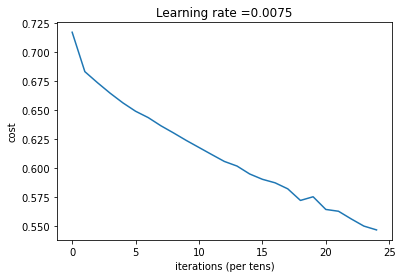

In [6]:
learning_rate = 0.0075
num_iterations = 2500
layers_dims = [train_x.shape[0], 20, 7, 5, 1]
activation_functions = ["relu", "relu", "relu", "sigmoid"]

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

In [7]:
pred_train = predict(train_x, train_y, parameters, activation_functions)
pred_dev = predict(dev_x, dev_y, parameters, activation_functions)

Accuracy: 0.7177500000000001
Accuracy: 0.5947500000000001


### Experiment #2: Increase learning rate
When running experiment #1 we noticed the cost was decreasing and didn't stabilize (it kept reducing its rate of change considerably) before ending the model’s training. Due to this, we figured we might get better results if we let the model learn at a faster rate.

We raised our previous learning_rate up to 0.01, let's see what results we get.

#### Set Hyper-Parameters and Train

Cost after iteration 0: 0.717320
Cost after iteration 100: 0.680117
Cost after iteration 200: 0.677973
Cost after iteration 300: 0.686415
Cost after iteration 400: 0.664820
Cost after iteration 500: 0.640959
Cost after iteration 600: 0.632392
Cost after iteration 700: 0.629711
Cost after iteration 800: 0.618300
Cost after iteration 900: 0.611583
Cost after iteration 1000: 0.659875
Cost after iteration 1100: 0.602134
Cost after iteration 1200: 0.594598
Cost after iteration 1300: 0.582704
Cost after iteration 1400: 0.575779
Cost after iteration 1500: 0.670873
Cost after iteration 1600: 0.573414
Cost after iteration 1700: 0.552470
Cost after iteration 1800: 0.572627
Cost after iteration 1900: 0.658540
Cost after iteration 2000: 0.547970
Cost after iteration 2100: 0.558700
Cost after iteration 2200: 0.623237
Cost after iteration 2300: 0.522798
Cost after iteration 2400: 0.541647


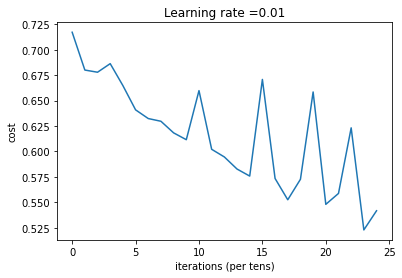

In [8]:
learning_rate = 0.01
num_iterations = 2500
layers_dims = [train_x.shape[0], 20, 7, 5, 1]
activation_functions = ["relu", "relu", "relu", "sigmoid"]

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

In [9]:
pred_train = predict(train_x, train_y, parameters, activation_functions)
pred_dev = predict(dev_x, dev_y, parameters, activation_functions)

Accuracy: 0.7317500000000002
Accuracy: 0.6060000000000001


### Experiment #3: Increase iterations

From the results we obtained from experiment #2, we noticed the cost managed to decrease further than on experiment #1 as we expected as well as an increase in accuracy. We believe that may be due to having a high learning rate that causes the change in cost to be more drastic and faster. 

Due to this, we will increase the amount of iterations to see whether that can lead us to better results, given a bit more training.

For this experiment, we raised the number of iterations from 2500 to 3000.

Cost after iteration 0: 0.717320
Cost after iteration 100: 0.680117
Cost after iteration 200: 0.677973
Cost after iteration 300: 0.686415
Cost after iteration 400: 0.664820
Cost after iteration 500: 0.640959
Cost after iteration 600: 0.632392
Cost after iteration 700: 0.629711
Cost after iteration 800: 0.618300
Cost after iteration 900: 0.611583
Cost after iteration 1000: 0.659875
Cost after iteration 1100: 0.602134
Cost after iteration 1200: 0.594598
Cost after iteration 1300: 0.582704
Cost after iteration 1400: 0.575779
Cost after iteration 1500: 0.670873
Cost after iteration 1600: 0.573414
Cost after iteration 1700: 0.552470
Cost after iteration 1800: 0.572627
Cost after iteration 1900: 0.658540
Cost after iteration 2000: 0.547970
Cost after iteration 2100: 0.558700
Cost after iteration 2200: 0.623237
Cost after iteration 2300: 0.522798
Cost after iteration 2400: 0.541647
Cost after iteration 2500: 0.535844
Cost after iteration 2600: 0.566983
Cost after iteration 2700: 0.493429
Cost

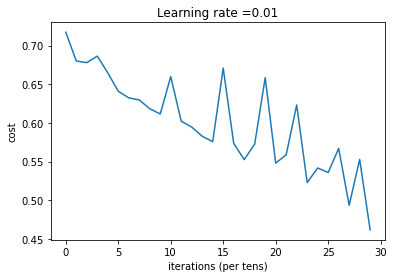

In [11]:
learning_rate = 0.01
num_iterations = 3000
layers_dims = [train_x.shape[0], 20, 7, 5, 1]
activation_functions = ["relu", "relu", "relu", "sigmoid"]

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

In [12]:
pred_train = predict(train_x, train_y, parameters, activation_functions)
pred_dev = predict(dev_x, dev_y, parameters, activation_functions)

Accuracy: 0.7387500000000002
Accuracy: 0.5835000000000001


### Experiment #4: Reducing number of layers

The results from our previous experiment were satisfactory. We got a higher accuracy as we expected from the increase in iterations. The problem with this experiment is that the difference between the train_set results and the dev_set results increased. We will go back to 2500 iterations as this change did not appear to be favorable.

We wish to improve this further and, based on the hyper-parameters we chose, we thought it could be worth it to try reducing the model's complexity by reducing the number of layers by one.

In this experiment we set the model to train with 2 hidden layers instead of 3, let's see if we manage to increase our performance.

#### Set Hyper-Parameters and Train

Cost after iteration 0: 0.700410
Cost after iteration 100: 0.663812
Cost after iteration 200: 0.637237
Cost after iteration 300: 0.618114
Cost after iteration 400: 0.604566
Cost after iteration 500: 0.593495
Cost after iteration 600: 0.582513
Cost after iteration 700: 0.572472
Cost after iteration 800: 0.562260
Cost after iteration 900: 0.548058
Cost after iteration 1000: 0.545623
Cost after iteration 1100: 0.580366
Cost after iteration 1200: 0.530637
Cost after iteration 1300: 0.497105
Cost after iteration 1400: 0.515423
Cost after iteration 1500: 0.524704
Cost after iteration 1600: 0.463880
Cost after iteration 1700: 0.621284
Cost after iteration 1800: 0.477693
Cost after iteration 1900: 0.472563
Cost after iteration 2000: 0.601437
Cost after iteration 2100: 0.447518
Cost after iteration 2200: 0.494034
Cost after iteration 2300: 0.447892
Cost after iteration 2400: 0.390647


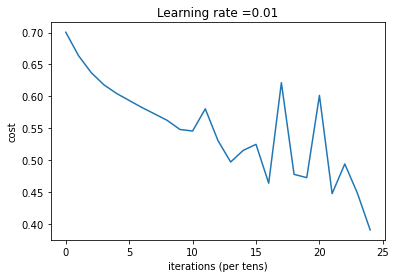

In [13]:
learning_rate = 0.01
num_iterations = 2500
layers_dims = [train_x.shape[0], 20, 7, 1]
activation_functions = ["relu", "relu", "sigmoid"]

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

In [14]:
pred_train = predict(train_x, train_y, parameters, activation_functions)
pred_dev = predict(dev_x, dev_y, parameters, activation_functions)

Accuracy: 0.7765000000000002
Accuracy: 0.6005000000000001


### Experiment #5: Increasing number of neurons in hidden layers

The results we got from experiment #4 got us lower cost as we hoped, and it also got us higher accuracy than we expected. We think maybe adding more neurons might help but we will still be keeping only two hidden layers to improve the results.

#### Set Hyper-Parameters and Train

Cost after iteration 0: 0.738102
Cost after iteration 100: 0.673697
Cost after iteration 200: 0.662672
Cost after iteration 300: 0.653136
Cost after iteration 400: 0.642633
Cost after iteration 500: 0.633908
Cost after iteration 600: 0.626071
Cost after iteration 700: 0.618972
Cost after iteration 800: 0.613271
Cost after iteration 900: 0.605990
Cost after iteration 1000: 0.599464
Cost after iteration 1100: 0.594658
Cost after iteration 1200: 0.587897
Cost after iteration 1300: 0.583059
Cost after iteration 1400: 0.576233
Cost after iteration 1500: 0.570187
Cost after iteration 1600: 0.564028
Cost after iteration 1700: 0.557738
Cost after iteration 1800: 0.552330
Cost after iteration 1900: 0.544906
Cost after iteration 2000: 0.540022
Cost after iteration 2100: 0.532447
Cost after iteration 2200: 0.526305
Cost after iteration 2300: 0.517075
Cost after iteration 2400: 0.513406


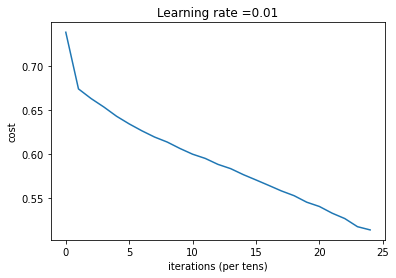

In [15]:
learning_rate = 0.01
num_iterations = 2500
layers_dims = [train_x.shape[0], 25, 15, 1]
activation_functions = ["relu", "relu", "sigmoid"]

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

In [16]:
pred_train = predict(train_x, train_y, parameters, activation_functions)
pred_dev = predict(dev_x, dev_y, parameters, activation_functions)

Accuracy: 0.7360000000000002
Accuracy: 0.58575


### Experiment #6: Reducing amount of data samples

While experimenting, we accidentally reduced our dataset and were finding some nice results, so we stopped to consider whether the overfitting problem we were having previously was due to having too much data. We figured that training with half the data could potentially get us better results and we think it's worth it to try it out. Let's see what we get.

#### Reload dataset with fewer samples

In [20]:
dev_x_orig, dev_y, classes = load_data('dev_set')
train_x_orig, train_y, classes = load_data('training_set')
test_x_orig, test_y, classes = load_data('test_set')

dev_x_orig = dev_x_orig[:1000]
dev_y = dev_y[:, :1000]

train_x_orig = train_x_orig[:1000]
train_y = train_y[:, :1000]

test_x_orig = test_x_orig[:500]
test_y = test_y[:, :500]

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 610.13it/s]


In [21]:
dev_x_flatten = dev_x_orig.reshape(dev_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
dev_x = dev_x_flatten/255.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("dev_x's shape: " + str(dev_x.shape))
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

dev_x's shape: (12288, 1000)
train_x's shape: (12288, 1000)
test_x's shape: (12288, 500)


#### Set Hyper-Parameters and Train

Cost after iteration 0: 0.756062
Cost after iteration 100: 0.652678
Cost after iteration 200: 0.625634
Cost after iteration 300: 0.598971
Cost after iteration 400: 0.576642
Cost after iteration 500: 0.508723
Cost after iteration 600: 0.495683
Cost after iteration 700: 0.463004
Cost after iteration 800: 0.423549
Cost after iteration 900: 0.440264
Cost after iteration 1000: 0.402538
Cost after iteration 1100: 0.422015
Cost after iteration 1200: 0.364137
Cost after iteration 1300: 0.465494
Cost after iteration 1400: 0.336256
Cost after iteration 1500: 0.241581
Cost after iteration 1600: 0.327520
Cost after iteration 1700: 0.252403
Cost after iteration 1800: 0.201009
Cost after iteration 1900: 0.168051
Cost after iteration 2000: 0.395081
Cost after iteration 2100: 0.150247
Cost after iteration 2200: 0.118423
Cost after iteration 2300: 0.135506
Cost after iteration 2400: 0.099130


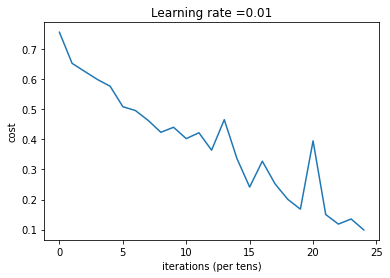

In [22]:
learning_rate = 0.01
num_iterations = 2500
layers_dims = [train_x.shape[0], 25, 15, 1]
activation_functions = ["relu", "relu", "sigmoid"]

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

In [23]:
pred_train = predict(train_x, train_y, parameters, activation_functions)
pred_dev = predict(dev_x, dev_y, parameters, activation_functions)

Accuracy: 0.9830000000000004
Accuracy: 0.5850000000000001


##  6 - Final Performance Estimation
Although we were hopeful of seeing better results, it turns out that reducing the amount of data increased the accuracy substantially, but when comparing to the dev set this is the one with the greatest difference. What we get from this is that reducing the data initially appeared to help, but in reality it was helping the model overfit to the specific dataset we used to train it.


To evaluate the performance of our model as per the last experiment, we test the results with our test_set data.

### Training on the best results
In the end, the best results we managed to obtain were the ones found on experiment #4, so we will train again under those hyper-parameters and check the test results.

#### Reload dataset with fewer samples

In [28]:
dev_x_orig, dev_y, classes = load_data('dev_set')
train_x_orig, train_y, classes = load_data('training_set')
test_x_orig, test_y, classes = load_data('test_set')

dev_x_flatten = dev_x_orig.reshape(dev_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
dev_x = dev_x_flatten/255.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("dev_x's shape: " + str(dev_x.shape))
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 587.20it/s]


dev_x's shape: (12288, 4000)
train_x's shape: (12288, 4000)
test_x's shape: (12288, 2000)


#### Set Hyper-Parameters and Train

Cost after iteration 0: 0.700410
Cost after iteration 100: 0.663812
Cost after iteration 200: 0.637237
Cost after iteration 300: 0.618114
Cost after iteration 400: 0.604566
Cost after iteration 500: 0.593495
Cost after iteration 600: 0.582513
Cost after iteration 700: 0.572472
Cost after iteration 800: 0.562260
Cost after iteration 900: 0.548058
Cost after iteration 1000: 0.545623
Cost after iteration 1100: 0.580366
Cost after iteration 1200: 0.530637
Cost after iteration 1300: 0.497105
Cost after iteration 1400: 0.515423
Cost after iteration 1500: 0.524704
Cost after iteration 1600: 0.463880
Cost after iteration 1700: 0.621284
Cost after iteration 1800: 0.477693
Cost after iteration 1900: 0.472563
Cost after iteration 2000: 0.601437
Cost after iteration 2100: 0.447518
Cost after iteration 2200: 0.494034
Cost after iteration 2300: 0.447892
Cost after iteration 2400: 0.390647


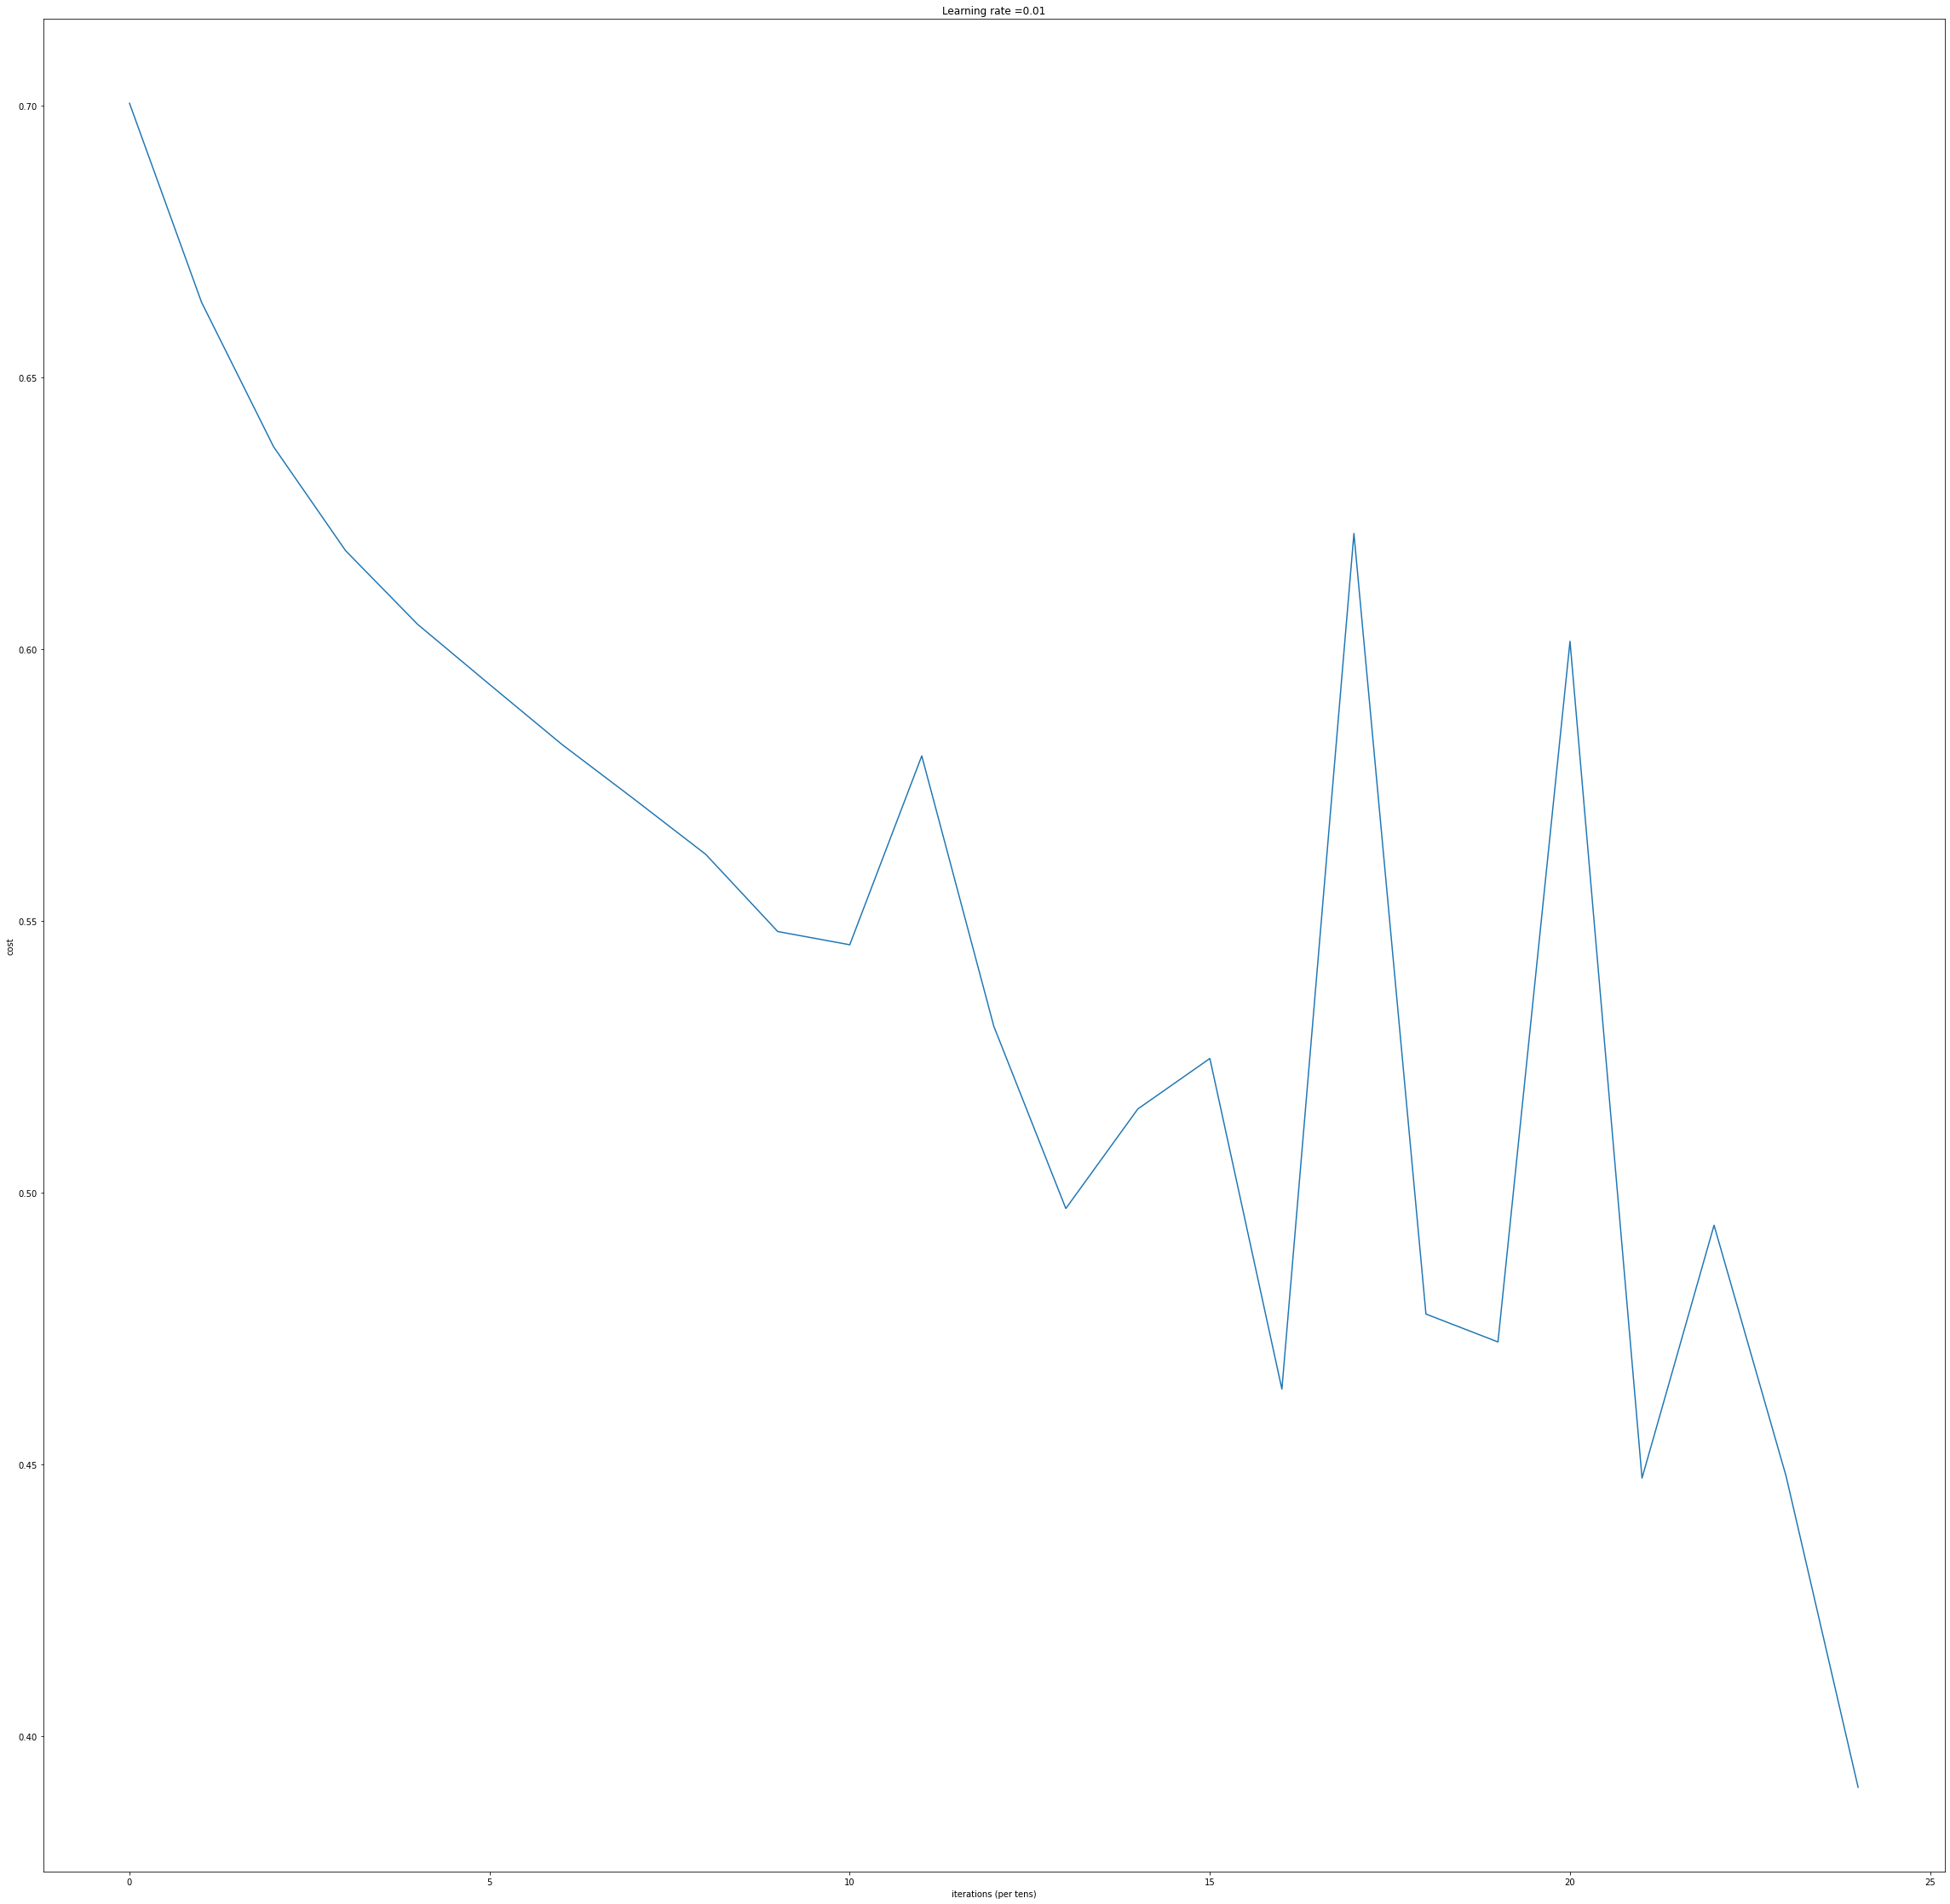

In [29]:
learning_rate = 0.01
num_iterations = 2500
layers_dims = [train_x.shape[0], 20, 7, 1]
activation_functions = ["relu", "relu", "sigmoid"]

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

In [30]:
pred_train = predict(train_x, train_y, parameters, activation_functions)

Accuracy: 0.7765000000000002


In [31]:
pred_dev = predict(dev_x, dev_y, parameters, activation_functions)

Accuracy: 0.6005000000000001


In [32]:
pred_test = predict(test_x, test_y, parameters, activation_functions)

Accuracy: 0.6105
